In [1]:
pip install DateTime

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import datetime

In [3]:
from PyAstronomy import pyasl

In [4]:
from __future__ import print_function, division


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
import numpy as np


frequency_range = (1419405751, 1421405751)


num_points = 513  


x_axis_linspace = np.linspace(frequency_range[0], frequency_range[1], num_points)


print(x_axis_linspace)


[1.41940575e+09 1.41940966e+09 1.41941356e+09 1.41941747e+09
 1.41942138e+09 1.41942528e+09 1.41942919e+09 1.41943309e+09
 1.41943700e+09 1.41944091e+09 1.41944481e+09 1.41944872e+09
 1.41945263e+09 1.41945653e+09 1.41946044e+09 1.41946434e+09
 1.41946825e+09 1.41947216e+09 1.41947606e+09 1.41947997e+09
 1.41948388e+09 1.41948778e+09 1.41949169e+09 1.41949559e+09
 1.41949950e+09 1.41950341e+09 1.41950731e+09 1.41951122e+09
 1.41951513e+09 1.41951903e+09 1.41952294e+09 1.41952684e+09
 1.41953075e+09 1.41953466e+09 1.41953856e+09 1.41954247e+09
 1.41954638e+09 1.41955028e+09 1.41955419e+09 1.41955809e+09
 1.41956200e+09 1.41956591e+09 1.41956981e+09 1.41957372e+09
 1.41957763e+09 1.41958153e+09 1.41958544e+09 1.41958934e+09
 1.41959325e+09 1.41959716e+09 1.41960106e+09 1.41960497e+09
 1.41960888e+09 1.41961278e+09 1.41961669e+09 1.41962059e+09
 1.41962450e+09 1.41962841e+09 1.41963231e+09 1.41963622e+09
 1.41964013e+09 1.41964403e+09 1.41964794e+09 1.41965184e+09
 1.41965575e+09 1.419659

In [ ]:
file_names = ["zero.csv","20.csv", "44.csv", "60.csv", "80.csv", "100.csv", 
"120.csv", "140.csv", "ground.csv", "sky.csv",]
arrays_list = []
# Loop through each file
for i in file_names:
    # Read CSV file into a DataFrame
    i = "/Users/kavinfidel/Documents/H1_line/data/"+ i
    df = pd.read_csv(i, header=None)
    
    # Convert DataFrame to a NumPy array
    df_array = df.values
    
    # Indices to pop (delete)
    indices_to_pop = [0, 1, 2, 3, 4, 5]
    
    # Delete specified indices from the array
    df_array = np.delete(df_array, indices_to_pop)
    arrays_list.append(df_array)

In [8]:
arrays_list = np.array(arrays_list)
arrays_list = 10**(0.1*arrays_list)

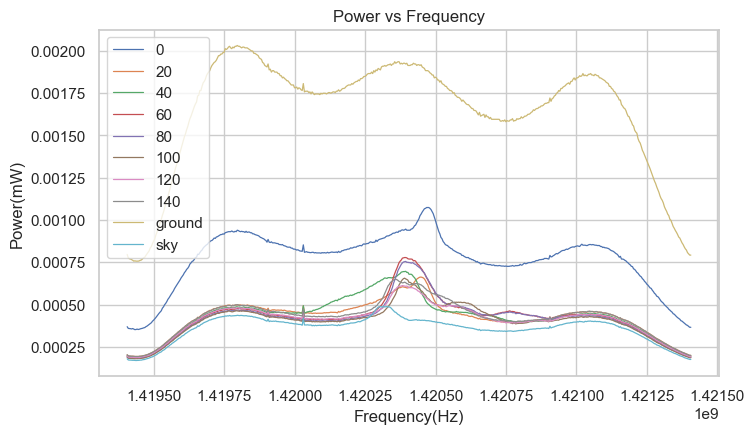

In [54]:
plt.figure(figsize = (8,4.5))
for i in range(10):
    Color = ["blue","green","red","cyan","magenta","yellow","blue","green","black","black"]
    Label = ["0","20","40","60","80","100","120","140","ground","sky"]
    # Extracting relevant columns
    timestamps = ['15-12-2023 16:45:34']
    frequency_range = (1419405751, 1421405751)

    # Plotting
    
    plt.plot(x_axis_linspace,arrays_list[i],label = Label[i],linewidth = 0.9)


plt.title('Power vs Frequency')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Power(mW)')
plt.legend()

   
plt.savefig("Power_v_freq.png")

### All Power vs Frequency plots

### Function to find the reciever temperature

In [10]:
csv_0 = arrays_list[0]
csv_20 = arrays_list[1]
csv_44 = arrays_list[2]
csv_60 = arrays_list[3]
csv_80 = arrays_list[4]
csv_100 = arrays_list[5]
csv_120 = arrays_list[6]
csv_140 = arrays_list[7]
ground_csv = arrays_list[8]
sky_csv = arrays_list[9]

In [11]:
len(arrays_list)

10

In [12]:
def reciever_temp(ground_data, sky_data ):
    sky_temp = 5
    ground_temp = 300
    p1 = ground_data / sky_data
    T_r = (sky_temp * p1 - ground_temp) / (1 - p1)
    return T_r

    


In [13]:
tr = reciever_temp(ground_csv,sky_csv)
len(tr)

513

[1.41960888e+09 1.41974559e+09 1.41999169e+09 1.42003466e+09
 1.42005028e+09 1.42006591e+09 1.42010497e+09 1.42012450e+09
 1.42013622e+09 1.42017919e+09 1.42019481e+09 1.42039403e+09
 1.42051122e+09 1.42053075e+09 1.42055419e+09 1.42056591e+09
 1.42073778e+09 1.42078075e+09 1.42078466e+09 1.42082763e+09
 1.42096434e+09 1.42104247e+09 1.42104638e+09 1.42106591e+09]


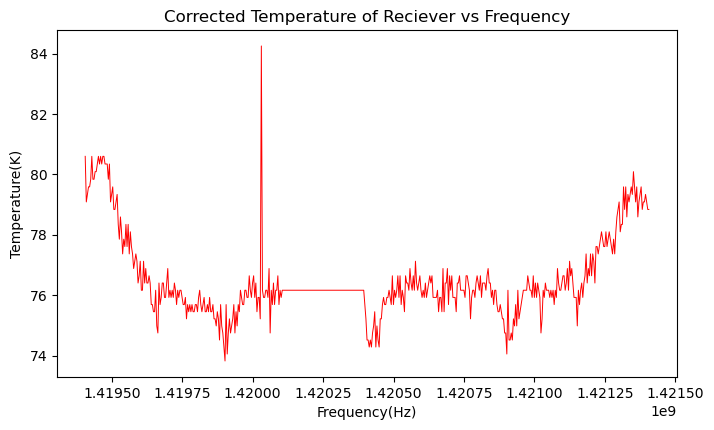

<Figure size 640x480 with 0 Axes>

In [14]:
temp_index=np.where(tr==76.16728577973586)
print(x_axis_linspace[temp_index])
lowcut_f=1.42010497e+09
highcut_f=1.42039403e+09
tr_new=tr
tr_new[np.where((x_axis_linspace<highcut_f) & (x_axis_linspace>lowcut_f))]=76.16728577973586
plt.figure(figsize=(8,4.5))
plt.plot(x_axis_linspace,tr_new,"red",linewidth = 0.7)
plt.title("Corrected Temperature of Reciever vs Frequency")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Temperature(K)")
plt.show()
plt.savefig("Rec_corr_freq.png")


###  Calculating the cut frequencies

In [15]:
cut_f0 = 1.42023388e+09
cut_f1 = 1.42055809e+09

In [16]:
cut_f1 - cut_f0

324210.0

### New T_r

In [17]:
temp_array = [i+212 for i in range(84)]


In [18]:
tr_new = tr
tr_new[temp_array] = 76.88608387277088

### Plotting new T_r

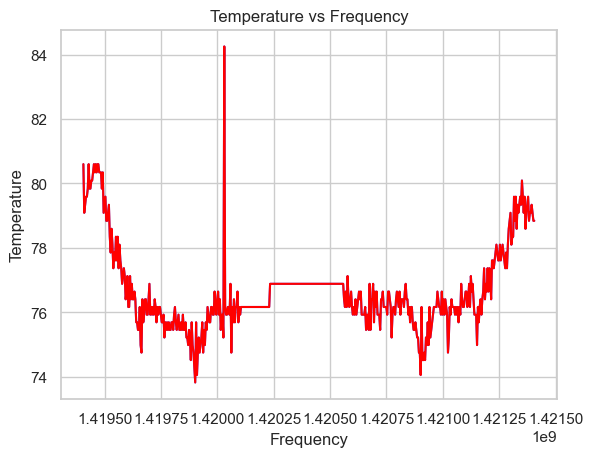

In [19]:
import matplotlib.pyplot as plt
sns.set(style = "whitegrid")

# Extracting relevant columns
timestamps = ['15-12-2023 16:45:34']
frequency_range = (1419405751, 1421405751)
values = df_array

# Plotting
plt.plot(x_axis_linspace,tr,color = "blue", alpha = 0.7)
plt.plot(x_axis_linspace,tr_new,color = "red")


plt.title('Temperature vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('Temperature')

plt.show()

### Function to find Source temp:

In [20]:
def source_temp(p_source):
    sky_temp = 5
    ground_temp = 300
    ground_data = ground_csv
    T_r = tr_new
    temp = ground_temp + T_r
    T_source = ((temp/(ground_data))*p_source)-T_r

    return T_source

In [21]:
source_temp_list = [] 
for i in range(8):
    t_s = source_temp(arrays_list[i])
    source_temp_list.append(t_s) # list that will contain the source temperature for the subplots


In [22]:
len(source_temp_list)
source_temp_list

[array([95.78857722702023, 96.19429216800334, 96.86988733241301,
        96.73592533367746, 96.73592533367733, 98.64457322172416,
        97.83104602294311, 96.19567294105128, 97.00821673232045,
        98.10021638851217, 96.87354980356127, 97.1466121825475,
        97.42066891801699, 97.96587580630084, 97.0112356542408,
        97.14661218254764, 97.01123565424078, 97.0112356542409,
        96.7383930188744, 97.14661218254753, 97.55577238858064,
        96.19567294105138, 96.73839301887418, 97.81617309435386,
        97.27609022094279, 97.95815085357792, 97.13636172748568,
        97.54203174244213, 96.59836303175948, 97.27609022094292,
        96.59342965575338, 96.45530284720589, 97.67428366032966,
        97.53248309618266, 98.32844377531892, 96.45530284720593,
        96.58670427690255, 97.80605933278626, 97.39077194183537,
        97.40091835641233, 97.1189470253943, 96.72551876631478,
        96.98827525101869, 97.11894702539419, 97.3788885394882,
        97.24915073251034, 97.1

### CSV for source_temp_list

### Velocity Calibration:


### LSR correction:

In [23]:
lsr = pd.read_csv("/Users/john/Documents/Extra_cur/RAWS2023/H1_line/group1/RADec_data.csv")
print(lsr["RA"], lsr["Dec"])

0    336.9232
1    266.5209
2    277.2000
3    286.6000
4    296.7000
5    308.7000
6    330.8000
7      6.9000
8     50.9000
Name: RA, dtype: float64 0     5.7020
1   -29.8077
2   -12.1000
3     6.6000
4    24.2000
5    41.3000
6    55.3000
7    63.3000
8    58.8000
Name: Dec, dtype: float64


In [24]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Provided RA and Dec coordinates
ra_deg = [336.9232, 266.5209, 277.2000, 286.6000, 296.7000, 308.7000, 330.8000, 6.9000, 50.9000]
dec_deg = [5.7020, -29.8077, -12.1000, 6.6000, 24.2000, 41.3000, 55.3000, 63.3000, 58.8000]

# Convert degrees to the desired format
coords_deg = SkyCoord(ra=ra_deg * u.degree, dec=dec_deg * u.degree, frame='icrs')
coords_str = coords_deg.to_string('hmsdms', precision=2, sep=' ', pad=True)

# Display the result
for i, coord_str in enumerate(coords_str):
    print(f'hd{i + 1} = "{coord_str}"')


hd1 = "22 27 41.57 +05 42 07.20"
hd2 = "17 46 05.02 -29 48 27.72"
hd3 = "18 28 48.00 -12 06 00.00"
hd4 = "19 06 24.00 +06 36 00.00"
hd5 = "19 46 48.00 +24 12 00.00"
hd6 = "20 34 48.00 +41 18 00.00"
hd7 = "22 03 12.00 +55 18 00.00"
hd8 = "00 27 36.00 +63 18 00.00"
hd9 = "03 23 36.00 +58 48 00.00"


ValueError: cannot reshape array of size 513 into shape (9,9)

### Converting the RA/Dec to proper form for LSR

In [25]:
# Here creating a list to hold the vlsr values for each source
v_lsr_list = []

## LSR Correction factor

In [26]:
# Putting the code from LSR into a generalized loop
for i in range(9):
    obs_ra_2000, obs_dec_2000 = pyasl.coordsSexaToDeg(coords_str[i])
    dt = datetime.datetime(2023, 12, 15, 17)
    jd = pyasl.jdcnv(dt)
    longitude = 73.8253
    latitude = 18.5593
    altitude = 554
    # Calculate barycentric correction (debug=True show
    # various intermediate results)
    corr, hjd = pyasl.helcorr(longitude, latitude, altitude,
    obs_ra_2000, obs_dec_2000, jd, debug=True)
    19
    #print("Barycentric correction [km/s]: ", corr)
    #print("Heliocentric Julian day: ", hjd)
    # Calculate LSR correction
    v_sun = 20.5 # peculiar velocity (km/s) of sun w.r.t. LSR
    # solar apex
    sun_ra = math.radians(270.2)
    sun_dec = math.radians(28.7)
    obs_dec = math.radians(obs_dec_2000)
    obs_ra = math.radians(obs_ra_2000)
    a = math.cos(sun_dec) * math.cos(obs_dec)
    b = (math.cos(sun_ra) * math.cos(obs_ra)) + (math.sin(sun_ra)
    * math.sin(obs_ra))
    c = math.sin(sun_dec) * math.sin(obs_dec)
    v_rs = v_sun * ((a * b) + c)
    v_lsr = corr + v_rs
    v_lsr_list.append(v_lsr)




----- HELCORR.PRO - DEBUG INFO - START ----
(obs_long (East positive),obs_lat,obs_alt) Observatory coordinates [deg,m]:  73.8253 18.5593 554
(ra,dec) Object coordinates (for epoch 2000.0) [deg]:  336.9232083333333 5.702
(ra,dec) Object coordinates (precessed to epoch 2024.041096) [deg]:  337.2259908203776 5.825270676223359
(ut) Universal time (middle of exposure) [hrs]:  17.00000000372529
(jd) Julian date (middle of exposure) (JD):  2460294.2083333335
(hjd) Heliocentric Julian date (middle of exposure) (HJD):  2460294.2071914854
(gmst) Greenwich mean sidereal time [hrs]:  22.606319433287013
(lmst) Local mean sidereal time [hrs]:  3.5280060999537
(dlat) Latitude correction [deg]:  -416.93032237856863
(lat) Geocentric latitude of observer [deg]:  18.443486021561508
(r) Distance of observer from center of earth [m]:  6376589.689868745
(v) Rotational velocity of earth at the position of the observer [km/s]:  0.4649883078157614
(vdiurnal) Projected earth rotation and earth-moon revolution 

In [27]:
len(v_lsr_list)

9

In [28]:
len(v_lsr_list)
# There are nine readings here in the list.
# But only 8 were recorded, so popping the 9th one.
v_lsr_list.pop(8)

-6.177258040106975

In [29]:
len(v_lsr_list)

8

### >

In [30]:

f = x_axis_linspace
len(x_axis_linspace)

513

In [31]:
def vel_calibration(f):
    c = 299792
    f_0 = 1420.4057 * 1e6
    f_ratio = f/f_0
    v = c*(1-f_ratio)
    return v

In [32]:
v = vel_calibration(f)

In [33]:
v_lsr_list

[-20.990762689736542,
 8.633642745919868,
 8.053330897353195,
 6.535188899614964,
 4.0214445067308215,
 1.6804535000635479,
 -1.8199800339352894,
 -4.306633387955789]

In [34]:
len(v)

513

In [35]:
v_lsr_list[0]

-20.990762689736542

In [36]:
v_new_source = []

In [37]:
for i in range(8):
    x =  v+v_lsr_list[i]
    v_new_source.append(x)

In [38]:
len(v_new_source)

8

## Creating csv with v and linspace:

In [39]:
import csv
import pandas as pd

# Assuming v_new_source is a list of 8 arrays of size 513
 # Your actual data here

# Convert the list of arrays to a DataFrame
df = pd.DataFrame(v_new_source)

# Specify the CSV file path
csv_file_path = 'V_lsr.csv'

# Write the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False, header=False)  # Set header=True if you want to include column headers


In [40]:
import csv
import pandas as pd
# Create a DataFrame with two columns
df = pd.DataFrame({
    'Column1': v_new_source[1],
    'Column2': source_temp_list[1]
})

# Specify the CSV file path
csv_file_path = '20_test.csv'

# Write the DataFrame to a CSV file without including headers
df.to_csv(csv_file_path, index=False, header=False)

In [41]:
v_new_source[1]

array([ 219.68370443,  218.85924808,  218.03479173,  217.21033538,
        216.38587903,  215.56142268,  214.73696633,  213.91250998,
        213.08805363,  212.26359728,  211.43914093,  210.61468458,
        209.79022823,  208.96577187,  208.14131552,  207.31685917,
        206.49240282,  205.66794647,  204.84349012,  204.01903377,
        203.19457742,  202.37012107,  201.54566472,  200.72120837,
        199.89675202,  199.07229567,  198.24783932,  197.42338296,
        196.59892661,  195.77447026,  194.95001391,  194.12555756,
        193.30110121,  192.47664486,  191.65218851,  190.82773216,
        190.00327581,  189.17881946,  188.35436311,  187.52990676,
        186.7054504 ,  185.88099405,  185.0565377 ,  184.23208135,
        183.407625  ,  182.58316865,  181.7587123 ,  180.93425595,
        180.1097996 ,  179.28534325,  178.4608869 ,  177.63643055,
        176.8119742 ,  175.98751785,  175.16306149,  174.33860514,
        173.51414879,  172.68969244,  171.86523609,  171.04077

In [42]:
test_df = pd.read_csv("20_test.csv")
test_df

,219.68370443463178,16.11036590198752
0,218.859248,16.793534
1,218.034792,16.607315
2,217.210335,16.420421
3,216.385879,16.420421
4,215.561423,17.121799
...,...,...
507,-199.140122,16.573009
508,-199.964578,17.272381
509,-200.789034,16.352991
510,-201.613491,16.538827


In [43]:
import csv
import pandas as pd
#source_temp_list
# Assuming v_new_source is a list of 8 arrays of size 513
 # Your actual data here

# Convert the list of arrays to a DataFrame
df = pd.DataFrame(source_temp_list)

# Specify the CSV file path
csv_file_path = 'source_temp.csv'

# Write the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False, header=False)  # Set header=True if you want to include column headers

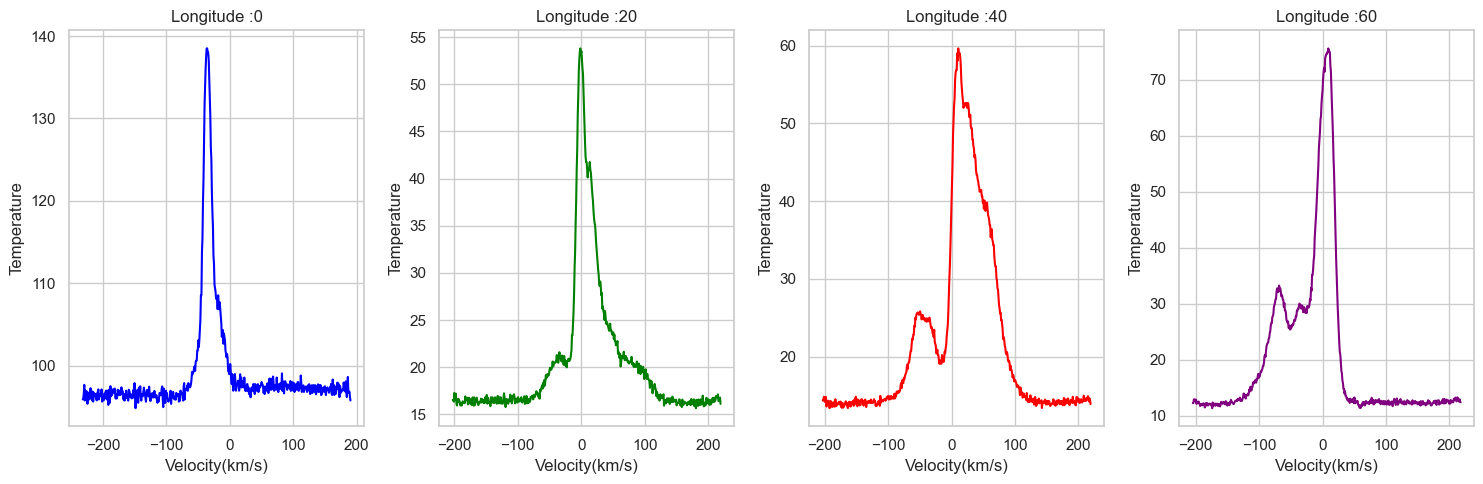

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5))
colors =  ['blue', 'green', 'red', 'purple']
for i in range(4):
    axes[i].plot(v+v_lsr_list[i], source_temp_list[i],color = colors[i-4]) # adding the LSR factor
    axes[i].set_title(f'Longitude :{i * 20}')
    axes[i].set_xlabel('Velocity(km/s)')
    axes[i].set_ylabel('Temperature')

plt.tight_layout()
plt.savefig("temp_vel.png")
plt.show()



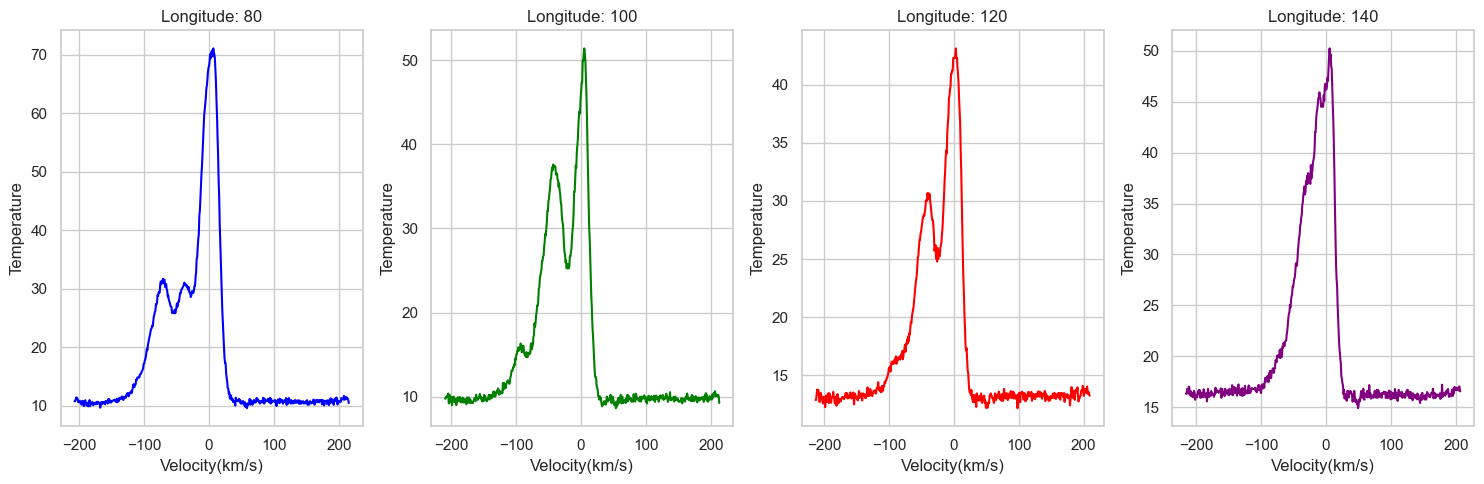

In [53]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5))
colors =  ['blue', 'green', 'red', 'purple']
for i in range(4,8):
    axes[i-4].plot(v+v_lsr_list[i], source_temp_list[i],color  = colors[i-4])
    axes[i-4].set_title(f'Longitude: {i * 20}')
    axes[i-4].set_xlabel('Velocity(km/s)')
    axes[i-4].set_ylabel('Temperature')

plt.tight_layout()
plt.savefig("temp_vel_2.png")
plt.show()

